In [79]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [80]:
# exercise 01

"""
Selecting the right value

Consider the following timeline that you are using to construct a predictive model. A certain donor in the population has changed his living place several times.

    Initial living place: USA
    March 2nd 2015: changed living place to Germany
    August 15th 2017: changed living place to Belgium
    April 26th 2018: changed living place to India

"""

# Instructions

"""
USA


Germany


Belgium (Answer)


India
"""

# solution



#----------------------------------#

# Conclusion

"""
Great!
"""

'\nGreat!\n'

In [81]:
import pandas as pd
basetable = pd.read_csv(path_data+'basetable_ch02-01.csv', parse_dates=['date_of_birth'], date_format="%Y-%m-%d")
basetable.head()

,donor_id,date_of_birth
0,98305,1992-02-12
1,1,1961-10-02
2,65539,1996-05-09
3,98308,1921-07-01
4,98309,1912-03-15


In [82]:
def calculate_age(date_of_birth, reference_date):
    age = reference_date.year - date_of_birth.year
    if ((date_of_birth.month > reference_date.month) | 
        ((date_of_birth.month == reference_date.month) &
         (date_of_birth.day > reference_date.day))):
        age = age - 1
    return(age)


In [83]:
# exercise 02

"""
Adding age

Given is an early stage basetable that contains the donor ID and birth date of candidate donors. In this exercise you will learn to add the age of these donors to the basetable. The method to calculate "age" is already implemented for your convenience. Keep in mind the following timeline of the basetable:


"""

# Instructions

"""

    Fill out the reference date.
    Add a column "age" to the basetable that is the age of the donor on the reference date. The function calculate_age has been implemented for you. It takes date_of_birth and reference_date as arguments.
    Print the mean age of all donors.

"""

# solution
from datetime import datetime

# Reference date
reference_date = datetime(2017, 5, 1)

# Add age to the basetable
basetable["age"] = (pd.Series([calculate_age(date_of_birth, reference_date)
                              for date_of_birth in basetable["date_of_birth"]]))

# Calculate mean age
print(round(basetable["age"].mean()))

#----------------------------------#

# Conclusion

"""
Well done. The average age is 62.
"""

62


'\nWell done. The average age is 62.\n'

In [84]:
segments = pd.read_csv(path_data+'segments.csv')
segments.head()

,donor_id,segment
0,18728,silver
1,729,gold
2,27922,silver
3,70087,silver
4,24611,gold


In [85]:
basetable = pd.read_csv(path_data+'donor_id.csv')

In [86]:
# exercise 03

"""
Adding the donor segment

Besides age, you also want to add the segment of a donor to the basetable. A selected group of donors that has made many donations in the past is assigned a segment: bronze, silver or gold. Given is an early stage basetable and a pandas dataframe segments that contains the segments for a selected group of the donors in the basetable. In this exercise you will add the segment to the basetable.

You can left join two pandas dataframes using the following code:

merged_df = pd.merge(df1, df2, on=["merge_id"],how="left")

"""

# Instructions

"""

    The donor id column is "donor_id" both in segments and basetable. Add the segment to the basetable.
    Count the number of donors in each segment.
    Count the number of donors with no segment assigned.

"""

# solution

# Add the donor segment to the basetable
basetable = pd.merge(basetable, segments, on =["donor_id"], how="left")

# Count the number of donors in each segment
basetable.groupby("segment").size()

# Count the number of donors with no segment assigned
print(basetable["segment"].isna().sum())

#----------------------------------#

# Conclusion

"""
Nice! You can observe that there are a high number of missing values. You will learn how to deal with them in the next chapter.
"""

9055


'\nNice! You can observe that there are a high number of missing values. You will learn how to deal with them in the next chapter.\n'

In [87]:
living_places = pd.read_csv(path_data+'living_places.csv', parse_dates=['start_date', 'end_date'], date_format="%Y-%m-%d")
living_places.head()

,donor_id,start_date,end_date,living_place
0,32768,1989-03-25,2000-07-06,India
1,32768,2000-07-06,2099-01-01,UK
2,98305,1954-04-06,1958-08-12,USA
3,98305,1958-08-12,1972-10-04,UK
4,98305,1972-10-04,1988-04-18,UK


In [88]:
living_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28806 entries, 0 to 28805
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   donor_id      28806 non-null  int64         
 1   start_date    28806 non-null  datetime64[ns]
 2   end_date      28806 non-null  datetime64[ns]
 3   living_place  28806 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 900.3+ KB


In [89]:
# exercise 04

"""
Adding living place

Finally, you want to add the living place of the donors to the basetable. The living places of the donors are given in living_places where the living place for each donor is given together with the start and end valid date of that living place. Keep in mind the following timeline that is used to construct the basetable: 
"""

# Instructions

"""

    Fill out the reference date.
    Create a new pandas dataframe living_places_reference_date that contains the living places of the donors at the reference date.
    Merge this new dataframe with the basetable.

"""

# solution

# Reference date
reference_date = datetime(2017, 5, 1)

# Select living place reference date
living_places_reference_date = living_places[(living_places["end_date"] <= reference_date) & 
                                            (living_places["start_date"] > reference_date)]

# Add living place to the basetable
basetable = pd.merge(basetable, living_places_reference_date[["donor_id", "living_place"]], on="donor_id")

#----------------------------------#

# Conclusion

"""
Great job! This exercise shows that even a static variable like living place should be added compliant with the timeline.
"""

'\nGreat job! This exercise shows that even a static variable like living place should be added compliant with the timeline.\n'

In [90]:
# exercise 05

"""
Selecting the appropriate date

Assume that you want to build a basetable using the following timeline. One of the variables that you would like to add to the basetable is recency, the time since the last donation.

Consider a donor that has donated on the following dates.

    January 1st 2017
    March 23th 2017
    April 29th 2017
    May 15th 2017

Which date should be used to calculate the recency?
"""

# Instructions

"""
January 1st 2017


March 23th 2017


April 29th 2017 (Answer)


May 15th 2017
"""

# solution



#----------------------------------#

# Conclusion

"""
Great! You should indeed use the last date before May 1st 2017.
"""

'\nGreat! You should indeed use the last date before May 1st 2017.\n'

In [91]:
gifts = pd.read_csv(path_data+'gifts.csv', index_col=0, parse_dates=['date'], date_format="%Y-%m-%d")
display(gifts.head())
basetable = pd.read_csv(path_data+'donor_id.csv')

,id,date,amount
0,1,2015-10-16,75.0
1,1,2014-02-11,111.0
2,1,2012-03-28,93.0
3,1,2013-12-13,113.0
4,1,2012-01-10,93.0


In [98]:
# exercise 06

"""
Maximum value last year

Next, you would like to add the maximum amount that a donor donated in 2017, but before May 1st, 2017 to the basetable. You have a few objects available to you: basetable contains the donor IDs of the population, and gifts contains gifts made by donors over time. For each donor in the population, add the maximum amount that this donor donated in 2017 to 'basetable`.
"""

# Instructions

"""

    Fill out the start and end date of the period over which you want to take the maximum.
    Select gifts made in 2017 using these start and end dates in the dataframe gifts_2017.
    Create a pandas dataframe that has the maximum amount for each donor in gifts_2017.
    Add this maximum amount to the basetable.

"""

# solution

# Start and end date of the aggregation period
start_date = datetime(2017, 1, 1)
end_date = datetime(2017, 5, 1)

# Select gifts made in 2017
gifts_2017 = gifts[(gifts["date"] >= start_date) & (gifts["date"] < end_date)]

# Maximum gift per donor in 2017
gifts_2017_bydonor = gifts_2017.groupby(["id"])["amount"].max().reset_index()
gifts_2017_bydonor.columns = ["donor_ID", "max_amount"]

# Add maximum amount to the basetable
basetable = pd.merge(basetable, gifts_2017_bydonor, left_on='donor_id', right_on='donor_ID')

#----------------------------------#

# Conclusion

"""
Nice! To add an aggregated variable to the basetable, you need to make sure you don't use information that is not available at the start of the target period.
"""

"\nNice! To add an aggregated variable to the basetable, you need to make sure you don't use information that is not available at the start of the target period.\n"

In [103]:
# exercise 07

"""
Recency of donations

Another interesting variable to add to the basetable is the recency, the time since the last donation. Given are two dataframes basetable and gifts, that contain the early stage basetable and the gifts made by donors over time. Add for each donor in the population the recency in days.

Keep in mind the following timeline that is used to calculate the basetable:


"""

# Instructions

"""

    Fill out the reference date.
    Create a pandas dataframe gifts_before_reference that contains gifts made before the reference date.
    Create a pandas dataframe last_gift that has for each donor in gifts_before_reference the last donation made and add the recency in days to last_gift.
    Add this recency to the basetable.

"""

# solution

# Reference date to calculate the recency
reference_date = datetime(2017, 5, 1)

# Select gifts made before the reference date
gifts_before_reference = gifts[(gifts["date"] < reference_date)]

# Latest gift per donor in 2017
last_gift = gifts_before_reference.groupby(["id"])["date"].max().reset_index()
last_gift["recency"] = reference_date - last_gift['date']
last_gift.columns = ['donor_id', 'date', 'recency']

# Add recency to the basetable
basetable = pd.merge(basetable, last_gift[["donor_id", "recency"]], how="left")

#----------------------------------#

# Conclusion

"""
Well done! The recency should be calculated with the start of the target period as reference date.
"""

'\nWell done! The recency should be calculated with the start of the target period as reference date.\n'

In [94]:
# exercise 08

"""
Ratio of last month's and last year's average

An interesting variable to add to the basetable is the average gift a donor donated last month compared to the average gift a donor donated last year. In this exercise, you will learn how to add this variable to the basetable. The gifts made last month by donors are already selected in gifts_last_month and the gifts made last year are selected in gifts_last_year.
"""

# Instructions

"""

    Calculate for each donor in gifts_last_month the average donation in the last month.
    Calculate for each donor in gifts_last_year the average donation in the last year.
    Add the average donation last month and average donation last year to the basetable.
    Calculate the ratio of last month's and last year's average donation in the basetable.


"""

# solution

# Average gift last month for each donor
average_gift_last_month = gifts_last_month.groupby("id")["amount"].mean().reset_index()
average_gift_last_month.columns = ["donor_ID", "mean_gift_last_month"]

# Average gift last year for each donor
average_gift_last_year = gifts_last_year.groupby('id')['amount'].mean().reset_index()
average_gift_last_year.columns = ["donor_ID", "mean_gift_last_year"]

# Add average gift last month and year to basetable
basetable = pd.merge(basetable, average_gift_last_month, on="donor_ID", how="left")
basetable = pd.merge(basetable, average_gift_last_year, on="donor_ID", how="left")

# Calculate ratio of last month's and last year's average
basetable["ratio_month_year"] = basetable["mean_gift_last_month"] / basetable["mean_gift_last_year"]
print(basetable.head())


#----------------------------------#

# Conclusion

"""
Great job! Note that the newly created variable might have missing values if no donations are made last year. You will learn how to deal with this in the next chapter.
"""

'\n\n'

In [95]:
# exercise 09

"""
Absolute difference between two years

As an other variable, you might want to add the absolute difference in donations made in the last year (2017) and the number of donations made in the year before that (2016). To add this variable to the basetable, two pandas dataframes gifts_2016 and gifts_2017 with donations made in 2016 and 2017 respectively are constructed for you.

Recall that you can count the occurances in a pandas dataframe df for each id in a column id in a pandas dataframe df using the groupby function:

df_grouped = df.groupby("id")["value"].count().reset_index()

and that you can left join two dataframes df1 and df2 on a given merge_id using the following code:

merged_df = pd.merge(df1, df2, on=["merge_id"], how="left")

"""

# Instructions

"""

    Calculate for each donor in gifts_2016 the number of donations made in 2016.
    Calculate for each donor in gifts_2017 the number of donations made in 2017.
    Add the number of donations made in 2016 and 2017 to the basetable.
    Calculate the difference between the number of donations made in 2017 and 2016 to the basetable.

"""

# solution

# Number of gifts in 2016 and 2017 for each donor
gifts_2016_bydonor = gifts_2016.groupby("id").size().reset_index()
gifts_2016_bydonor.columns = ["donor_ID", "donations_2016"]
gifts_2017_bydonor = gifts_2017.groupby("id").size().reset_index()
gifts_2017_bydonor.columns = ["donor_ID", "donations_2017"]

# Add number of gifts in 2016 and 2017 to the basetable
basetable = pd.merge(basetable, gifts_2016_bydonor, on="donor_ID", how="left")
basetable = pd.merge(basetable, gifts_2017_bydonor, on="donor_ID", how="left")

# Calculate the number of gifts in 2017 minus number of gifts in 2016
basetable.fillna(0)
basetable["gifts_2017_min_2016"] = basetable["donations_2017"] - basetable["donations_2016"]
print(basetable.head())

#----------------------------------#

# Conclusion

"""
Well done! You can add many more evolutions to the basetable.
"""

'\n\n'

In [109]:
basetable = pd.read_csv(path_data+'basetable_evo.csv').drop('Unnamed: 0', axis=1)
basetable.head()

,target,age,gender_F,donations_2017,donations_2017_min_2016
0,1,42,0,10,7
1,1,73,0,4,1
2,1,37,0,6,3
3,1,75,0,2,-4
4,1,32,1,9,5


In [110]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [111]:
y = basetable.target
X = basetable[['age', 'gender_F', 'donations_2017']]

logreg.fit(X,y)

pred_regular = logreg.predict_proba(X)

In [112]:
from sklearn.metrics import roc_auc_score

auc_regular = roc_auc_score(y, pred_regular[:,1])

In [114]:
# exercise 10

"""
Performance of evolution variables

Given is a basetable that has 3 regular predictive variables, namely "gender_F", "age", "donations_2017", and an evolution variable "donations_2017_min_2016" that contains the number of donations made in 2017 minus the number of donations made in 2016.

In this exercise you will see the added value of using evolution variables. You will construct two predictive models, one using the regular predictive variables given for you in variables_regular and one replacing "donations_2017" by "donations_2017_min_2016", these variables are given for you in variables_evolution. The logistic regression model is already initialized for you in logreg. The model using the regular variables has already been implemented, the AUC is in auc_regular.
"""

# Instructions

"""

    Select the evolution variables in X_evolution and fit the model.
    Make predictions using .predict_proba() using this model for all observations in X_evolution and calculate the AUC with roc_auc_score().
    Print the AUCs of both models and compare.

"""

# solution
variables_evolution = ['gender_F', 'age', 'donations_2017_min_2016']
# Select the evolution variables and fit the model
X_evolution = basetable[variables_evolution]
logreg.fit(X_evolution, y)

# Make predictions and calculate the AUC
predictions_evolution = logreg.predict_proba(X_evolution)[:,1]
auc_evolution = roc_auc_score(y, predictions_evolution)

# Print the respective AUC values
print(round(auc_regular, 2))
print(round(auc_evolution, 2))

#----------------------------------#

# Conclusion

"""
Great! Observe that the AUC using evolution variables is larger in this case!
"""

0.6
0.7


'\nGreat! Observe that the AUC using evolution variables is larger in this case!\n'

In [117]:
import matplotlib.pyplot as plt
import numpy as np

def create_pig_table(df, target, variable):
    # Create groups for each variable.
    groups = df[[target,variable]].groupby(variable)
    # Calculate size and target incidence for each group
    pig_table = groups[target].agg(['mean','size']).rename(columns={'mean':'Incidence', 'size':'Size'}).reset_index()
    # Return the predictor insight graph table
    return pig_table


def plot_pig(pig_table,variable):
    # Add the label for the size
    plt.ylabel("Size", rotation = 0,rotation_mode="anchor", ha = "right" )
    # Plot the bars with sizes 
    pig_table["Size"].plot(kind='bar', width = 0.5, color = "lightgray", edgecolor = "none") 
    # Plot the incidence line on secondary axis
    pig_table["Incidence"].plot(secondary_y = True)
    # Add Labels to the horizontal axis
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    # Make sure the groups are nicely centered
    plt.xlim([-0.5, len(pig_table)-0.5])
    # Add a label to the secondary vertical axis
    plt.ylabel("Incidence", rotation = 0, rotation_mode="anchor", ha = "left")
    # Add a label to the horizontal axis
    plt.xlabel(variable)
    # Show the graph
    plt.show()
    plt.close()

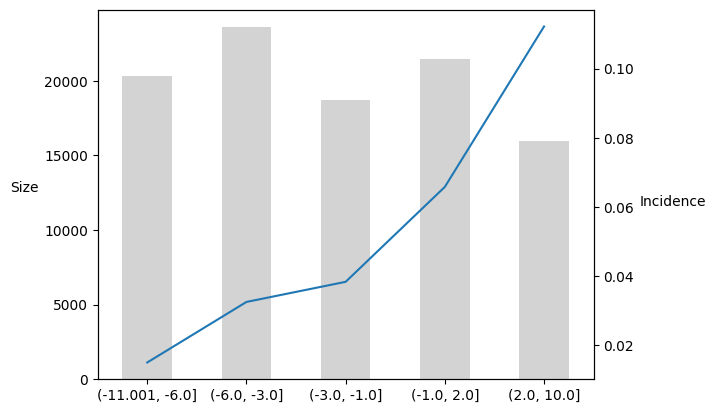

'\nNice! Apparently, people that donated more in 2017 are more likely to donate again.\n'

In [118]:
# exercise 11

"""
Meaning of evolution

In this exercise you will investigate the link between the variable "donations2017min_2016" that you added to the basetable in the previous exercises and the target, using a predictor insight graph.

For your convenience, the methods to create the predictor insight graph are pre-programmed.

To plot the predictor insight graph of a continuous variable variable in a basetable, you can follow these steps:

    Discretize the variable in n_bins bins:

basetable["variable_disc"] = pd.qcut(basetable["variable"], n_bins)

    Construct the predictor insight graph table:

pig_table = create_pig_table(basetable, "target","variable_disc")

    Plot the predictor insight graph based on this table:

plot_pig(pig_table,"variable_disc")

"""

# Instructions

"""

    Discretize the evolution variable donations_2017_min_2016 in 5 bins and add it to the basetable.
    Create the predictor insight graph table for this variable.
    Plot the predictor insight graph of this variable.


"""

# solution

# Discretize the variable in 5 bins and add to the basetable
basetable["donations_2017_min_2016_disc"] = pd.qcut(basetable["donations_2017_min_2016"], 5)

# Construct the predictor insight graph table
pig_table = create_pig_table(basetable, "target", "donations_2017_min_2016_disc")

# Plot the predictor insight graph
plot_pig(pig_table, "donations_2017_min_2016_disc")

#----------------------------------#

# Conclusion

"""
Nice! Apparently, people that donated more in 2017 are more likely to donate again.
"""